<a href="https://colab.research.google.com/github/batul-hussain/Ad_Ease_Case_Study/blob/main/AdEase_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement :**

Imagine Working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that we predict and optimize the ad placement for clients. we have data of 145k wikipedia pages and daily view count for each of them. Clients belong to different regions and need data on how their ads will perform on pages in different languages.

 

*   Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset
*   Exploratory Data Analysis : Separating the data,Analyzing and visualizing the data,Getting inferences,
*   Checking stationarity
Formatting the data for the model
Dickey fuller test
Decomposition
Differencing
*   Creating model training and forecasting with ARIMA, SARIMAX
ACF and PACF plot.
Training the model.
Forecasting for different languages/regions.
Plotting the final results
*   Forecasting with (20 points)
*   Facebook prophet
*   Creating a pipeline for working with multiple series (10 points)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/scaler case study/AdEase Time Series/train_1.csv',encoding='ISO-8859-1')

In [ ]:
data.head(2)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0


In [ ]:
data.shape

(145063, 551)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


**Separating different values like title, language, access type, and access origin.**

In [ ]:
data["language"] = data.Page.str.extract(r'(\_[a-z]*\.wik)',expand=True,)
data["language"]=data["language"].apply(lambda x: str(x).strip('_.wik'))

In [ ]:
#data["title"] = data.Page.str.extract(r'(^\d+[A-Z]*\d*)',expand =True)

In [ ]:
data["access_type"] = data.Page.str.extract(r'.org_([a-z]*-*[a-z]*)',expand=True)
#data["access_type"]=data["access_type"].apply(lambda x: str(x).strip('.org_'))

In [ ]:
data["access_origin"] = data.Page.str.extract(r'(_[a-z]*-*[a-z]*$)',expand=True)

In [ ]:
data.head(2)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language,access_type,access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh,all-access,_spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh,all-access,_spider


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 554 entries, Page to access_origin
dtypes: float64(550), object(4)
memory usage: 613.1+ MB


In [ ]:
data.isnull().sum()

Page                 0
2015-07-01       20740
2015-07-02       20816
2015-07-03       20544
2015-07-04       20654
                 ...  
2016-12-30        3635
2016-12-31        3465
language             0
access_type          0
access_origin        0
Length: 554, dtype: int64

In [ ]:
data["access_type"].value_counts()

all-access    74285
mobile-web    35931
desktop       34790
                 25
add               8
website           8
updated           6
vs                4
ru                3
de                1
von               1
en                1
Name: access_type, dtype: int64

In [ ]:
data["access_origin"].value_counts()

_all-agents    110150
_spider         34913
Name: access_origin, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

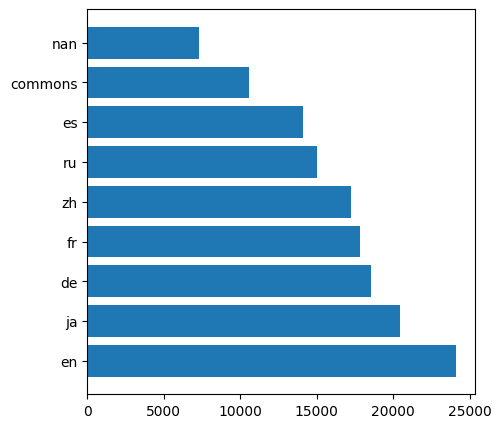

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(data["language"].value_counts().index,data["language"].value_counts())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

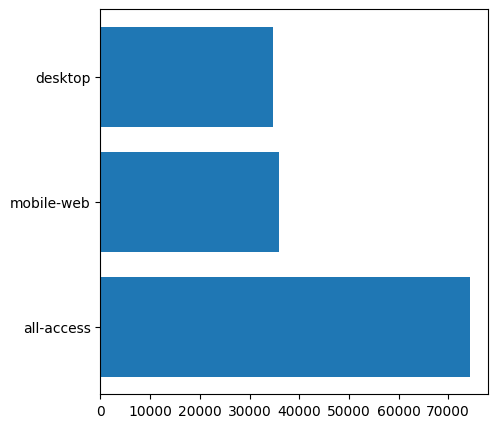

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(data["access_type"].value_counts()[:3].index,data["access_type"].value_counts()[:3])
plt.show

In [ ]:
df1 = data.copy()
df1 = data.drop(columns=["Page","access_type","access_origin"])

In [ ]:
df1.head(2)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh


In [ ]:
df2 = df1.groupby(["language"],as_index = False).count()
df2 = df2.T.reset_index().iloc[1:,:]
df2 = df2.rename(columns = {"index":"date",0:"commons",1:"de",2:"en",3:"es",4:"fr",5:"ja",6:"nan",7:"ru",8:"zh"})
df2["date"]=pd.to_datetime(df2["date"])
df2 = df2.set_index("date") # Set index as date

In [ ]:
df2.head(2)

,commons,de,en,es,fr,ja,nan,ru,zh
date,,,,,,,,,
2015-07-01,7293,16546,20560,12981,16062,18605,5111,13627,13538
2015-07-02,7254,16547,20610,12968,16061,18600,5025,13624,13558


In [ ]:
#Checking if all the dates are present in the data set or not
print(df2.index[-1]-df2.index[0])
print(df2.shape)

549 days 00:00:00
(550, 9)


# **ANALYSIS AND MODEL BUILDING FOR ENGLISH LANGUAGE PAGES** 

# **EDA**

In [ ]:
#Data set for English
df_eng = df2["en"].copy()

In [ ]:
df_eng.head(2)

date
2015-07-01    20560
2015-07-02    20610
Name: en, dtype: object

<Axes: >

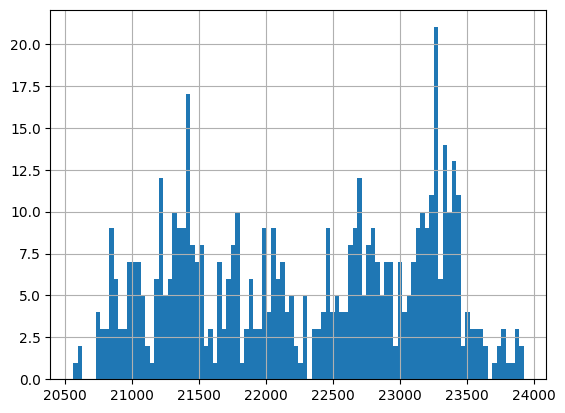

In [ ]:
df_eng.hist(bins=100)
# No significant outliers

<Axes: xlabel='date'>

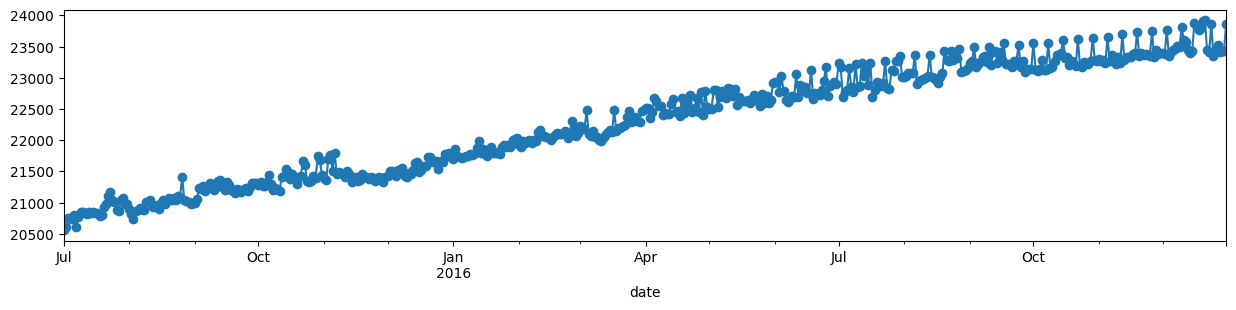

In [ ]:
df_eng.plot(style='-o',figsize = (15,3))
#Graph is increasing hence it has a trend and seasoninality

In [ ]:
# linear interpolation 
df_eng = df_eng.interpolate(method='linear')

In [ ]:
# By observing the graph, it feels there is no need to do anomalies treatment,however following is the method which can be used 
# anomalies - clip quantiles
#df_eng = df_eng.clip(upper=df_eng.quantile(0.99), lower=df_eng.quantile(0.01))

# **CHECKING STATIONARITY**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_eng)

#Since the p-value is not less than .05, we fail to reject the null hypothesis.
#This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

(-0.9727070147053039,
 0.7630881978943597,
 14,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 6513.887956342879)

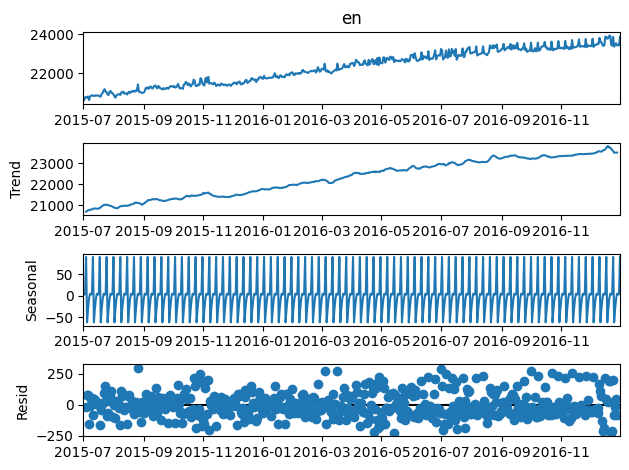

In [ ]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(df_eng, model='additive')
model.plot();

<Axes: xlabel='date'>

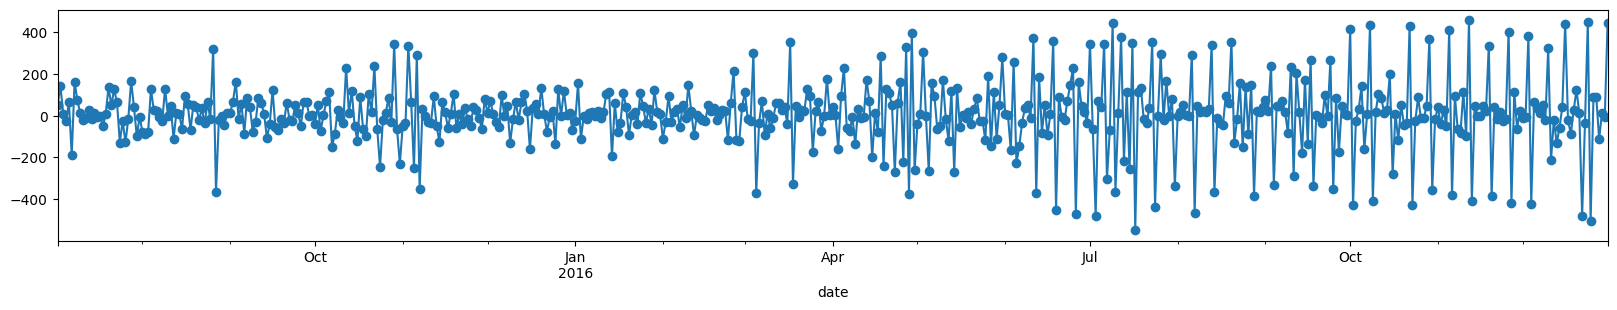

In [ ]:
#Differenciation to make data stationary
df_eng.diff().dropna().plot(style="-o",figsize = (20,3))

In [ ]:
adfuller(df_eng.diff().dropna())
#Since p value is less than 0.05, we accept the null hypothesis

(-8.236216394577227,
 5.880542314446157e-13,
 19,
 529,
 {'1%': -3.442772146350605,
  '5%': -2.8670191055991836,
  '10%': -2.5696881663873414},
 6494.840963930611)

# **ACF AND PACF PLOT for English Language Pages**

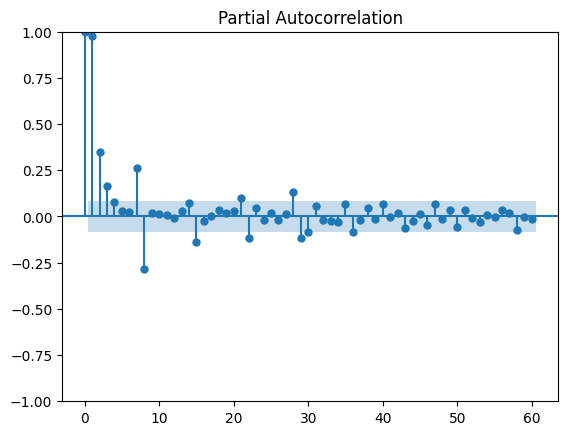

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_eng,lags=60,method="ywm");
#We see that data is correlated with its past 30 days value. After that peaks are inside the blue line, indicating low confidence on its dependency

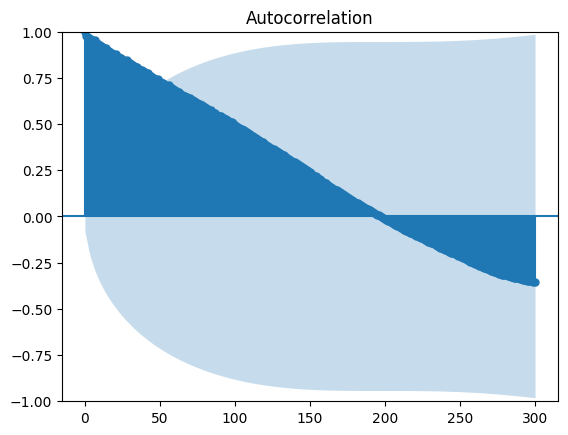

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_eng, lags=300);
#We see that data is correlated with its past 30 days value. After that peaks are inside the blue line, indicating low confidence on its dependency

# **ARIMA MODEL**

In [ ]:
df_eng = pd.DataFrame(df_eng)
df_eng['en'] = pd.to_numeric(df_eng['en'])

In [ ]:
# Splitting our data in train and test sets
train_x = df_eng.loc[df_eng.index < df_eng.index[-100]].copy()
test_x = df_eng.loc[df_eng.index >= df_eng.index[-100]].copy()

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization

MAE : 140.631
RMSE : 195.661
MAPE: 0.006


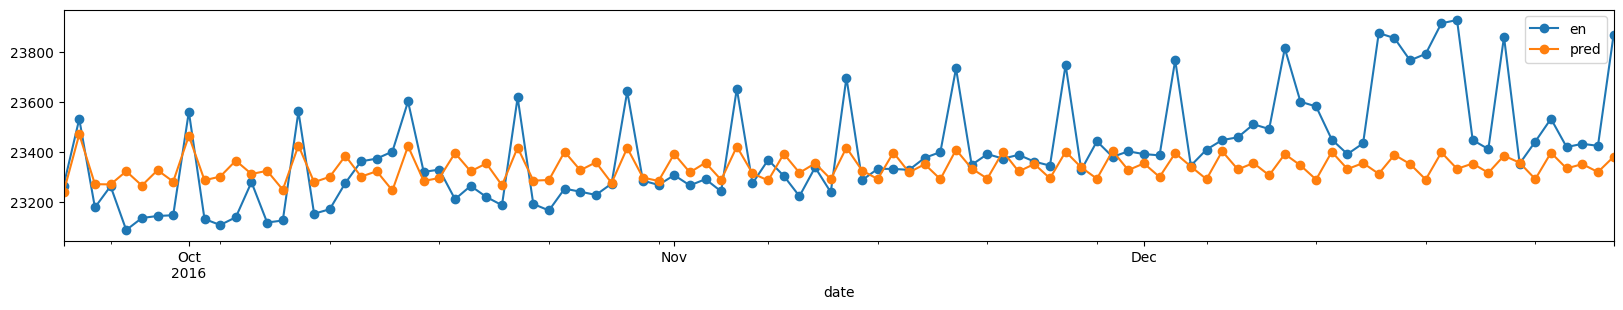

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x["en"],order=(12,1,12),seasonal_order=(2,0,2,20))
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=100)
#plotting
test_x.plot(style="-o",figsize = (20,3))
performance(test_x["en"],test_x["pred"])

# **MODELLING AFTER ADDING EXOG VARIABLE**

In [ ]:
exog = pd.read_excel("/content/drive/MyDrive/scaler case study/AdEase Time Series/exog.xlsx")

In [ ]:
exog.head(2)

,Exog
0,0
1,0


In [ ]:
df_eng['date'] = df_eng.index
df_eng['id'] = [i for i in range(550)]
exog["id"] = [i for i in range(549)]
df_eng = df_eng.merge(exog,on="id",how="left")
df_eng = df_eng.set_index("date")


In [ ]:
df_eng.head()

,en,id,Exog
date,,,
2015-07-01,20560,0,0.0
2015-07-02,20610,1,0.0
2015-07-03,20751,2,0.0
2015-07-04,20760,3,0.0
2015-07-05,20732,4,0.0


In [ ]:
df_eng.drop(columns = ["id"],inplace=True)
df_eng.head(2)

,en,Exog
date,,
2015-07-01,20560,0.0
2015-07-02,20610,0.0


In [ ]:
# Splitting our data in train and test sets
train_x_exog = df_eng.loc[df_eng.index < df_eng.index[-100]].copy()
test_x_exog = df_eng.loc[df_eng.index >= df_eng.index[-100]].copy()

In [ ]:
test_x_exog.drop(test_x_exog.tail(1).index,inplace=True)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_x_exog["en"],exog=train_x_exog["Exog"],order=(12,1,12),seasonal_order=(2,0,2,20))
model = model.fit(disp=False)
test_x_exog['pred'] = model.predict(start = test_x_exog.index[0],end=test_x_exog.index[-1],exog=test_x_exog["Exog"],steps=99)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization

<Axes: xlabel='date'>

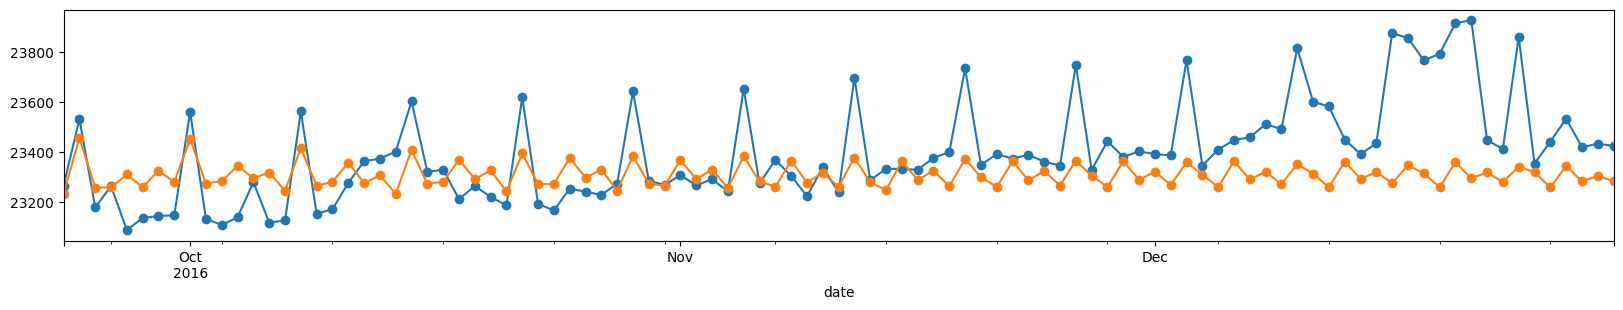

In [ ]:
test_x_exog["en"].plot(style="-o",figsize = (20,3))
test_x_exog["pred"].plot(style="-o",figsize = (20,3))

In [ ]:
performance(test_x_exog["en"],test_x_exog["pred"])

MAE : 148.845
RMSE : 206.306
MAPE: 0.006


# **USING GRID SEARCH CV TO GET BEST PARAMETERS**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error as mape
import itertools
import statsmodels.api as sm

In [ ]:
df_eng.drop(columns=["Exog"],inplace = True)

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=20, freq='M'):
  ans = []
  for comb in pdq:
    for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
  ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
  ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
  return ans_df

In [ ]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
sarimax_gridsearch(df_eng, pdq, pdqs, maxiter=20, freq='M')

,pdq,pdqs,bic


# **Forecasting with Facebook Prophet**

In [ ]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install cmdstanpy==1.0.4
!pip install holidays==0.14.2
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826135 sha256=ff1cba7849d774097f66d338a4e2117aa299327029680dbb9f9432bb42ec6fc8
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.0.4-py3-none-any.whl (73 kB)
  Attemp

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from fbprophet import Prophet

In [ ]:
fp = df_eng.copy()
fp["ds"]=fp.index
#fp.drop(columns = ["Exog_x","Exog"],inplace=True)
fp.rename(columns={"en":"y"},inplace=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


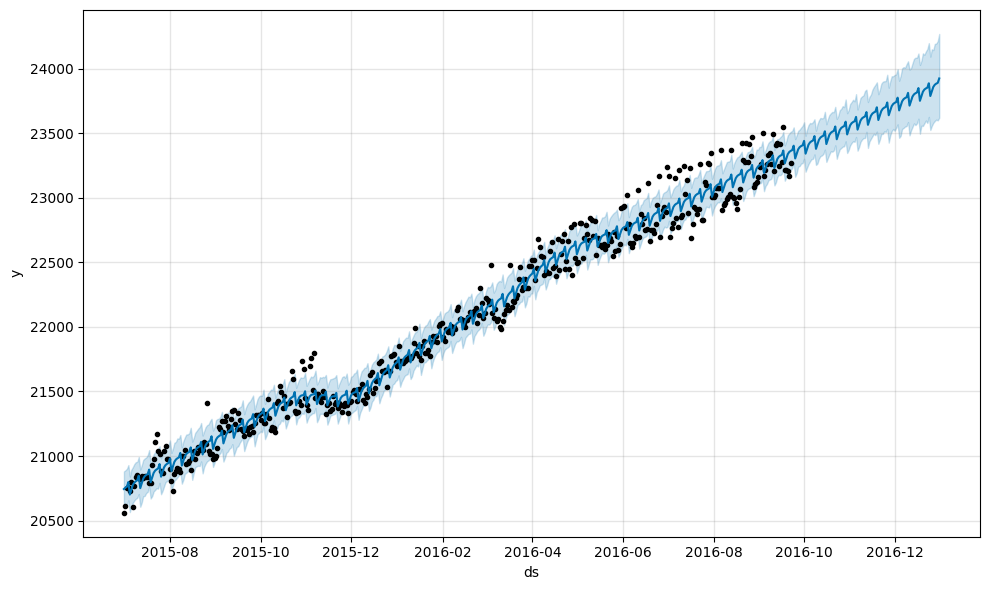

In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(fp[['ds','y']][:-100]) #here we are leaving last 39 observations because we will predict it in 'future'
future = m.make_future_dataframe(periods=100,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)


# **Questionnaire:**

1. Defining the problem statements and where can this and modifications of this be used?

*Problem Statement :
Imagine Working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that we predict and optimize the ad placement for clients. we have data of 145k wikipedia pages and daily view count for each of them. Clients belong to different regions and need data on how their ads will perform on pages in different languages.* 

2. Write 3 inferences you made from the data visualizations

--*Two access origin are all-agents: 110150,spider : 34913*

--*Three Access type are all access, desktop, mobile-web*

--*Most of the pages are of english language followed by japenese and german*

--*English language Data does not have outliers*

--*Data has trend, seasonality and error components* 

--*Past 30 days record can we used to make model for forecasting english language data*

3. What does the decomposition of series do?

*Deconstructs a time series into several components - Level, Trend, Seasonality, Noise*

4. What level of differencing gave you a stationary series? 

*Level 1*

5. Difference between arima, sarima & sarimax.
*ARIMA takes into account the past values (autoregressive, moving average) and predicts future values based on that. 
SARIMA similarly uses past values but also takes into account any seasonality patterns.*

*ARMA: Autoregressive + Moving Average*

*ARIMA: Autoregressive + Moving Average + Trend Differencing*

*SARIMA: Autoregressive + Moving Average + Trend Differencing + Seasonal Differencing*


6. Compare the number of views in different languages
*Maximum views are for English followed by Japenese and German*


7. What other methods other than grid search would be suitable to get the model for all languages?
*Makepipeline*

